In [2]:
import os
import pandas as pd
from kaggle import KaggleApi
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier

script_folder = os.path.dirname(os.path.abspath("__file__"))
destination_path = os.path.join(script_folder, "data")
dataset_name = 'rashikrahmanpritom/heart-attack-analysis-prediction-dataset'
features = [ 'age','trtbps','chol','thalachh','oldpeak','sex','exng','caa','cp','fbs','restecg','slp','thall']
target = 'output'

num_cols = ['age','trtbps','chol','thalachh','oldpeak']
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']

api = KaggleApi()
api.authenticate()

# Downloading the dataset
api.dataset_download_files(dataset_name, path=destination_path, unzip=True)


In [ ]:
from enum import Enum

class Models(Enum):
    GRADIENT_BOOSTING = 'Gradient Boosting',
    GAUSSIAN_NB = 'Gaussian Naive Bayes',
    #MLP_REGRESSOR = 'MLP Regressor',
    LOG_REGRESSION = 'Logistic Regression',
    MLP_CLASSIFIER = 'MLP Classifier',
    KNN = 'KNN',
    RANDOM_FOREST = 'Random Forest',
    DECISION_TREE = 'Decision Tree',


MODEL_TYPE = Models.MLP_CLASSIFIER


In [1]:
def _get_model(mdl_type):
    if mdl_type == Models.GRADIENT_BOOSTING:
        return GradientBoostingClassifier(n_estimators=50,
                                              learning_rate=0.09,
                                              max_depth=5,
                                              verbose=True)
    elif mdl_type == Models.GAUSSIAN_NB:
        return GaussianNB()
    #elif mdl_type == Models.MLP_REGRESSOR:
        # return MLPRegressor(random_state=1,
        #                         max_iter=500,
        #                         verbose=True)
    elif mdl_type == Models.MLP_CLASSIFIER:
        return MLPClassifier(solver='adam',
                                 alpha=1e-5,
                                 hidden_layer_sizes=(5, 2),
                                 random_state=1,
                                 max_iter=1000,
                                 verbose=True)
    elif mdl_type == Models.KNN:
        return KNeighborsClassifier(n_neighbors=5)
    elif mdl_type == Models.RANDOM_FOREST:
        return RandomForestClassifier(n_estimators = 100)
    elif mdl_type == Models.DECISION_TREE:
        return DecisionTreeClassifier(random_state=42, max_depth=2)
    elif mdl_type == Models.LOG_REGRESSION:
        return linear_model.LogisticRegression(solver = 'liblinear',C=10, penalty='l2', max_iter = 1000)
    else:
        raise NotImplementedError


In [3]:
data_path = os.path.join(os.getcwd(), "data", "heart.csv")
data = pd.read_csv(data_path)

In [4]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

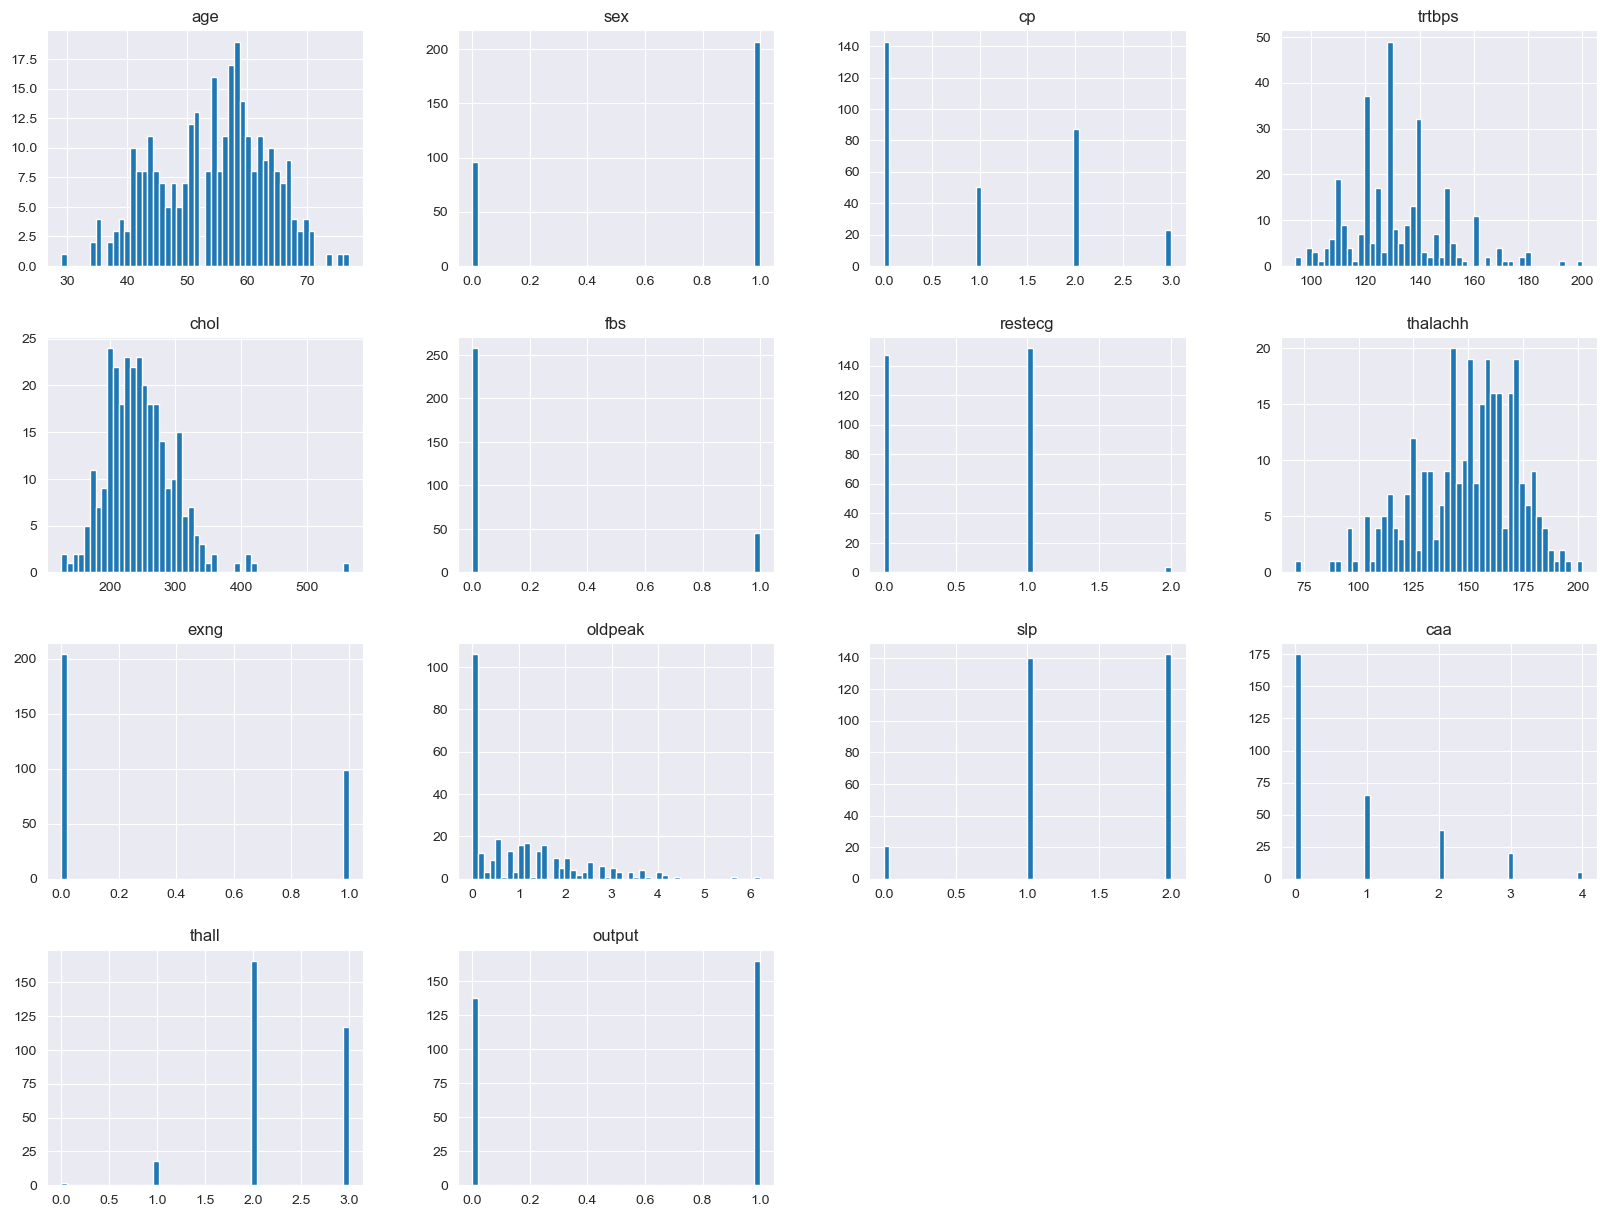

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

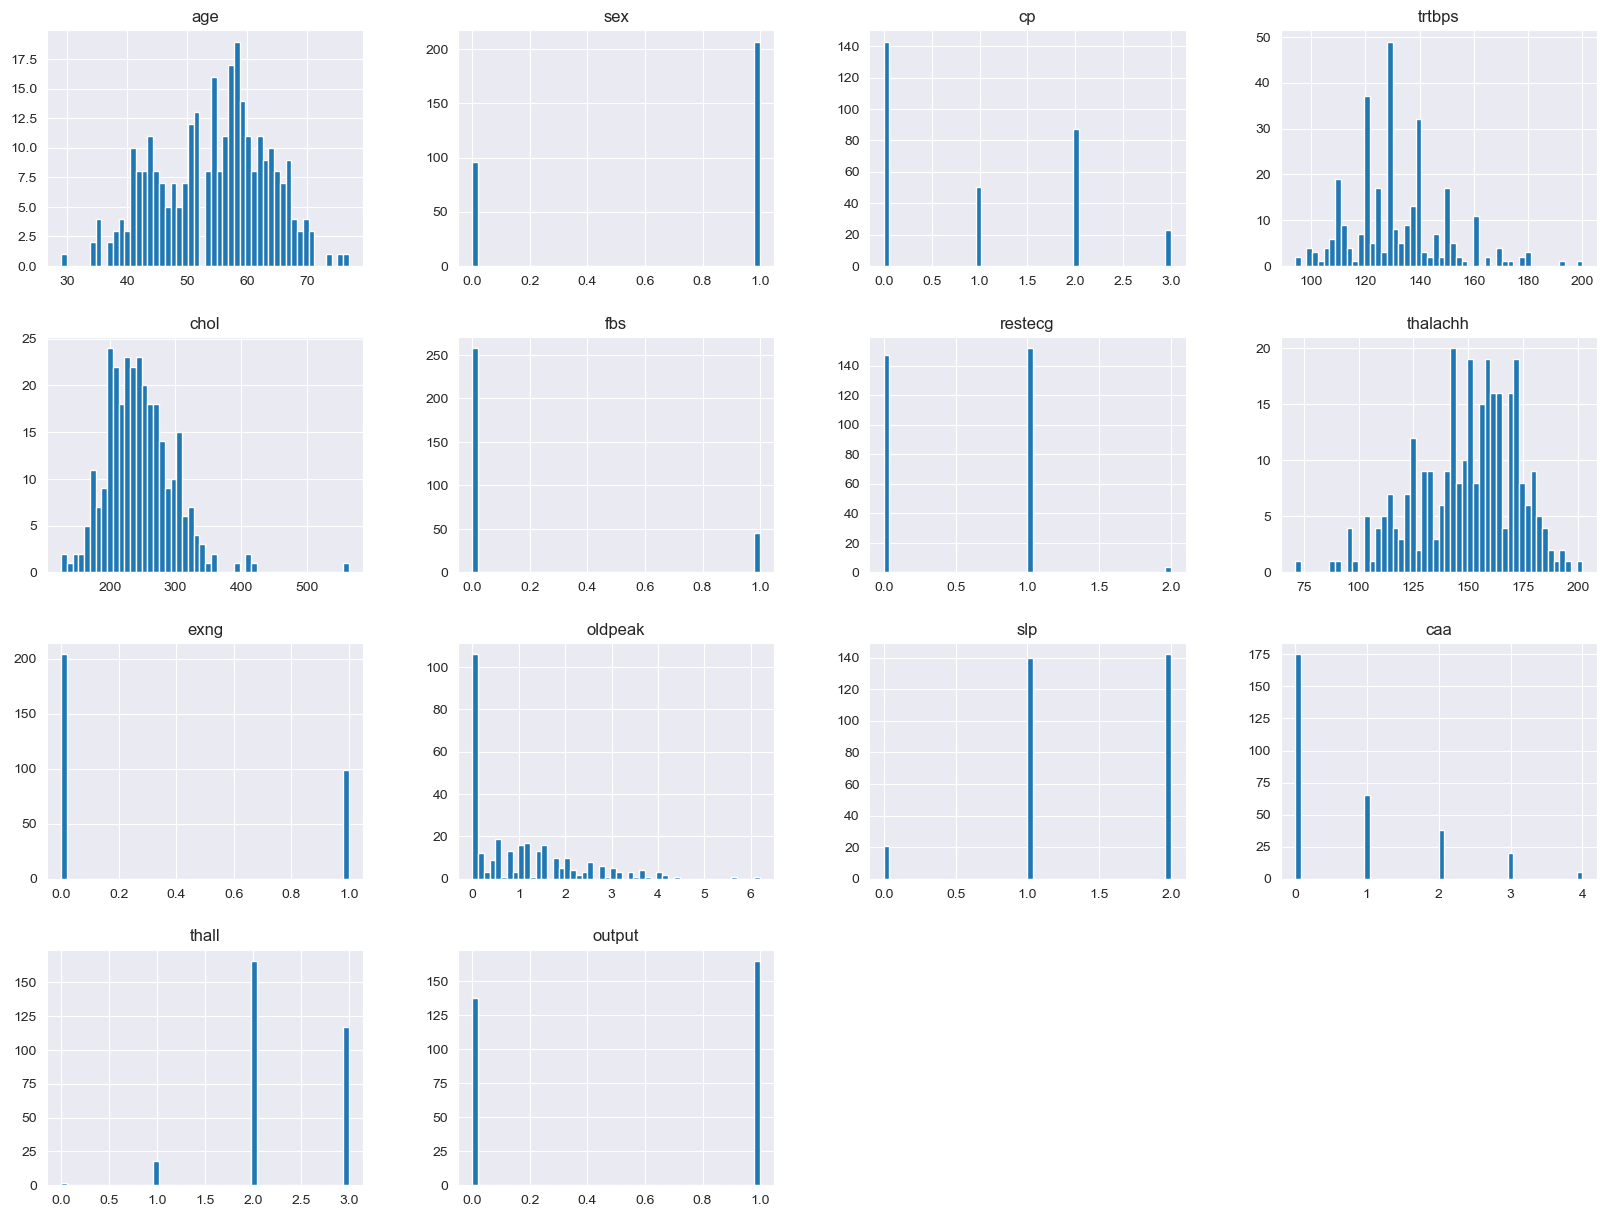

In [23]:
#plotting histogram for all the columns/features of data
data.hist(bins=50, figsize=(20, 15))

In [24]:
corr_matrix = data.corr()
corr_matrix['output'].sort_values(ascending=False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

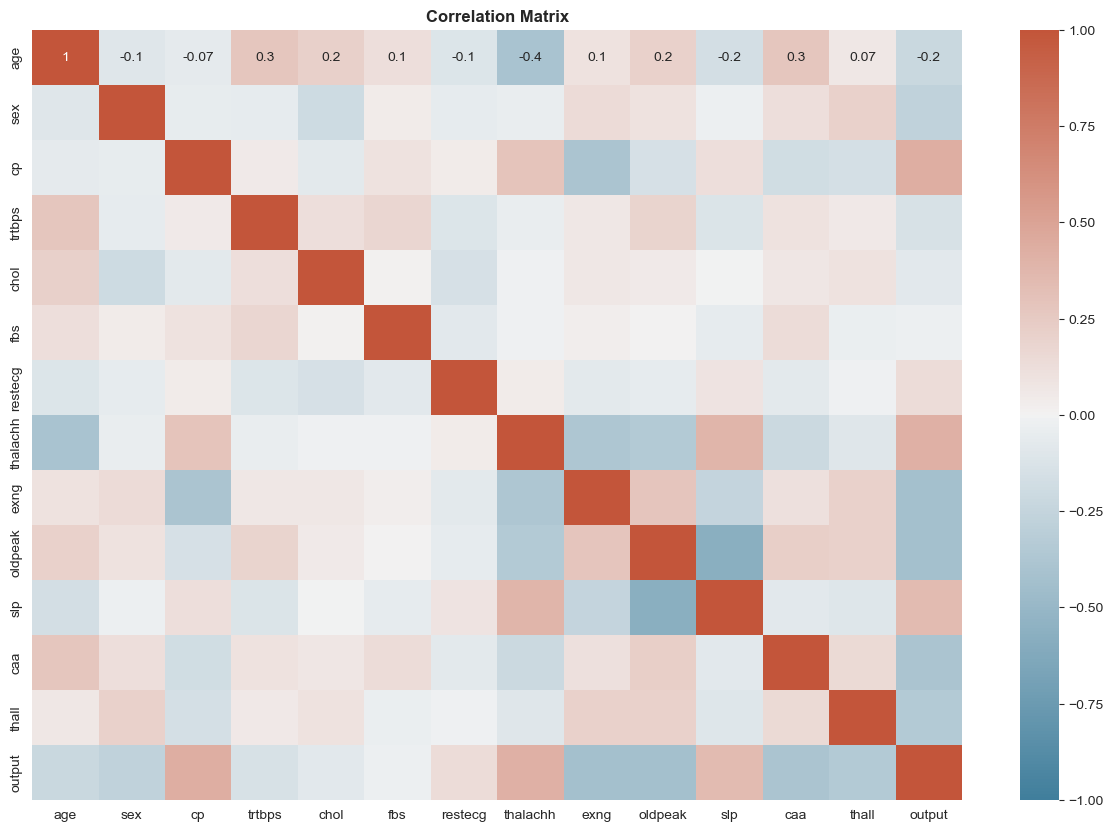

Text(0.5, 1.0, 'Correlation Matrix')

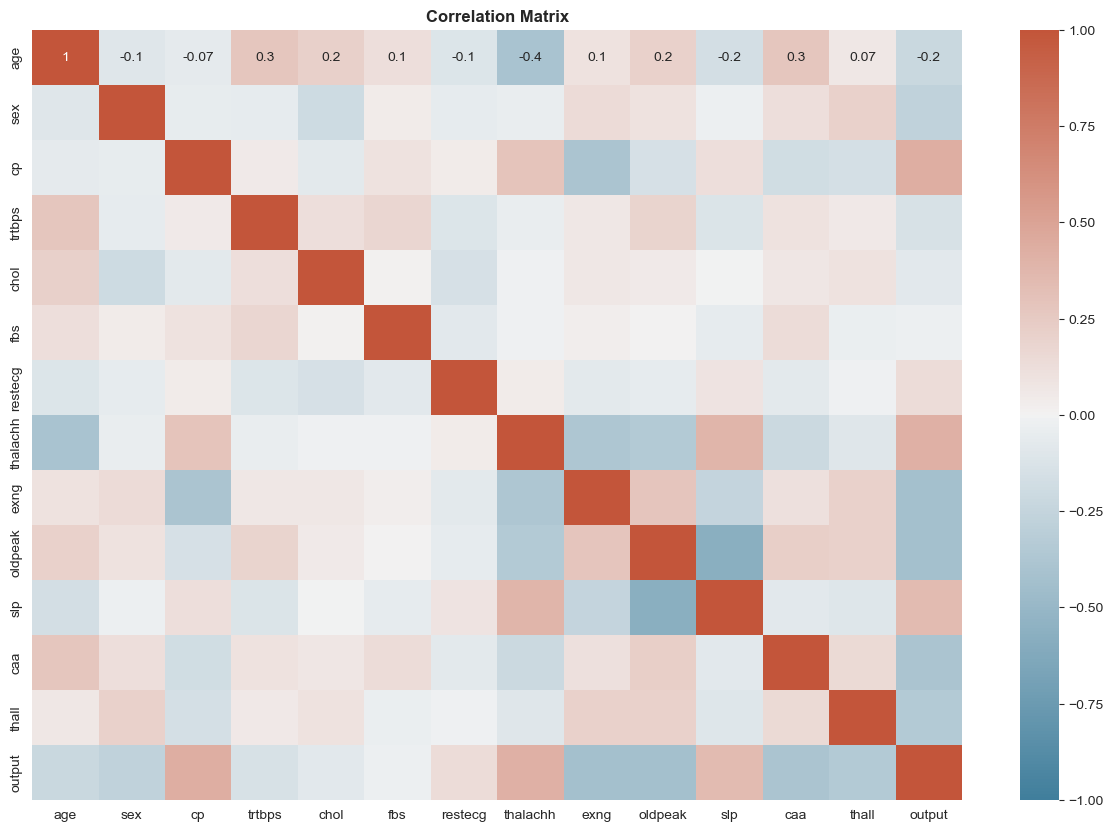

In [25]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

In [26]:
corr_pairs = corr_matrix.unstack()
positive_corr = corr_pairs[(corr_pairs >= 0.5) & (corr_pairs < 1)]
print("Highly Correlated Pairs: \n", positive_corr)


negative_corr = corr_pairs[(corr_pairs <= -0.5) & (corr_pairs > -1)]
print("\nLess Correlated Pairs: \n", negative_corr)

Highly Correlated Pairs: 
 Series([], dtype: float64)

Less Correlated Pairs: 
 oldpeak  slp       -0.577537
slp      oldpeak   -0.577537
dtype: float64
Highly Correlated Pairs: 
 Series([], dtype: float64)

Less Correlated Pairs: 
 oldpeak  slp       -0.577537
slp      oldpeak   -0.577537
dtype: float64


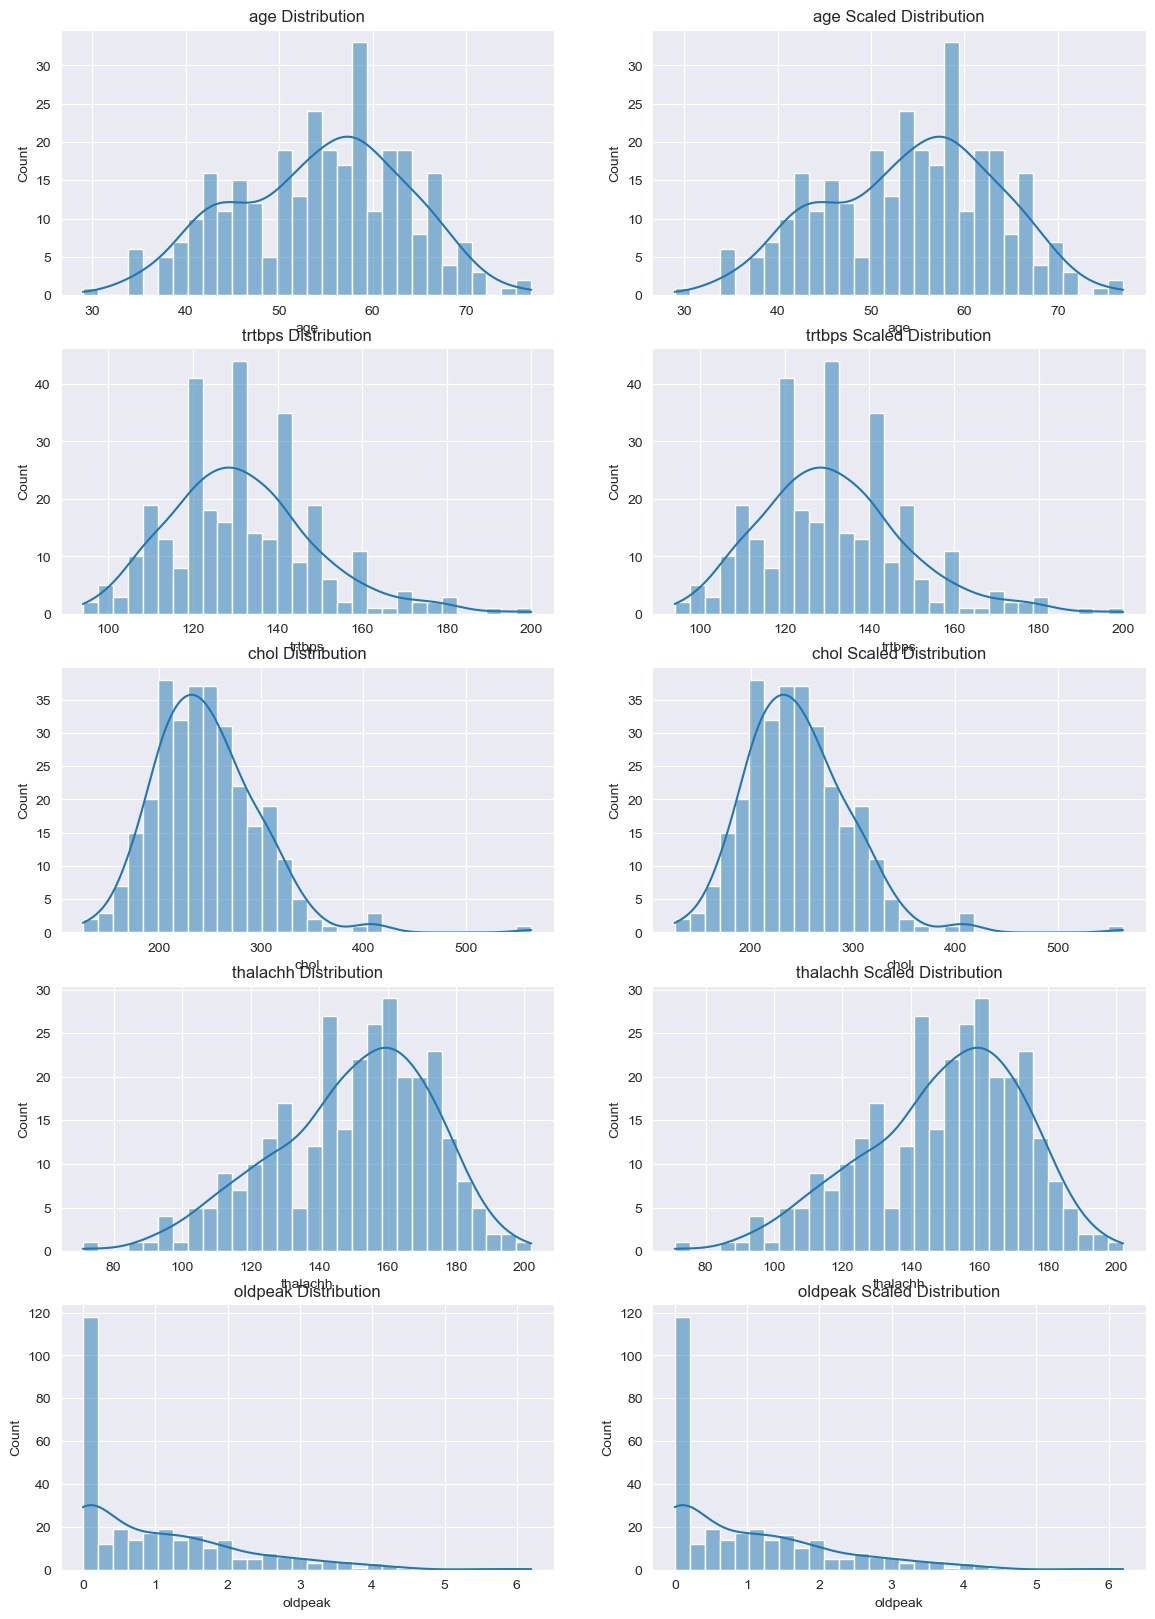

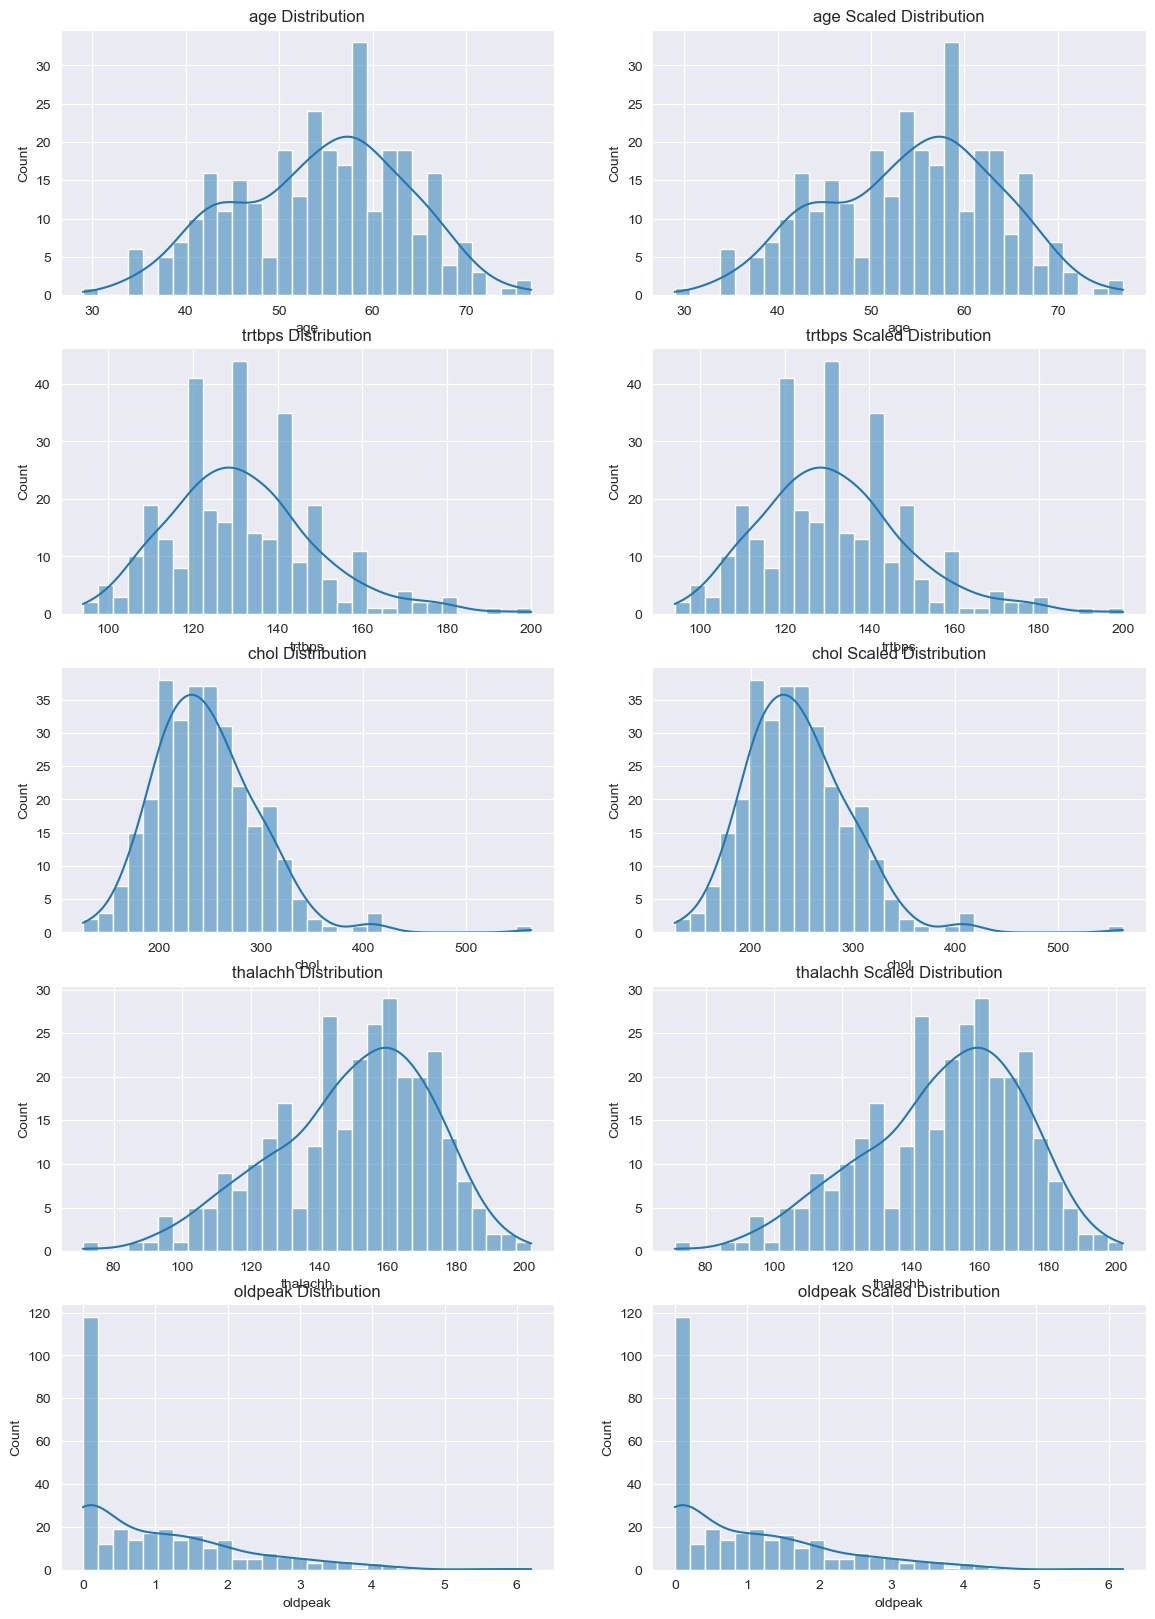

In [27]:
fig, ax = plt.subplots(len(num_cols), 2, figsize=(14, len(num_cols)*4))

for idx, column in enumerate(num_cols):
    sns.histplot(x=column, data=data, bins=30, kde=True,  ax=ax[idx,0])
    ax[idx,0].set_title(f"{column} Distribution")

    sns.histplot(x=column, data=data, bins=30, kde=True,  ax=ax[idx,1])
    ax[idx,1].set_title(f"{column} Scaled Distribution")

plt.show()

In [28]:
X = data.drop(target, axis=1)
y = data[target]
scaler = RobustScaler()
model_X = scaler.fit_transform(X[num_cols])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, shuffle=True)
X.describe(
)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [29]:
from sklearn import metrics, linear_model

model_results = {}
for mdl_typ in Models:
    print('Now training Model type', mdl_typ.value[0])
    metrics_dict = {}
    mdl = _get_model(mdl_typ)
    mdl.fit(X_train, y_train)
    y_pred = mdl.predict(X_test)
    metrics_dict['accuracy'] = metrics.accuracy_score(y_test, y_pred) * 100
    metrics_dict['confusion matrix'] = confusion_matrix(y_test, y_pred)
    metrics_dict['classification report'] = classification_report(y_test, y_pred)
    model_results[mdl_typ.value[0]] = metrics_dict


Now training Model type Gradient Boosting
      Iter       Train Loss   Remaining Time 
         1           1.2265            0.23s
         2           1.0980            0.14s
         3           0.9899            0.11s
         4           0.8982            0.09s
         5           0.8196            0.08s
         6           0.7464            0.07s
         7           0.6870            0.07s
         8           0.6321            0.06s
         9           0.5793            0.06s
        10           0.5342            0.06s
        20           0.2523            0.05s
        30           0.1341            0.03s
        40           0.0795            0.02s
        50           0.0476            0.00s
Now training Model type Gaussian Naive Bayes
Now training Model type Logistic Regression
Now training Model type MLP Classifier
Iteration 1, loss = 18.11975815
Iteration 2, loss = 17.74236840
Iteration 3, loss = 17.31703985
Iteration 4, loss = 16.84543242
Iteration 5, loss = 16.323

In [30]:
for k, v in model_results.items():
   print('#' * 60)
   print('{} Results'.format( k))
   print('#' * 60)
   print(v['confusion matrix'])
   print('-' * 30)
   print(v['classification report'])
   print('-' * 30)
   print('The {} Model had an accuracy of {}'.format(k, v['accuracy']))



############################################################
Gradient Boosting Results
############################################################
[[34  7]
 [15 35]]
------------------------------
              precision    recall  f1-score   support

           0       0.69      0.83      0.76        41
           1       0.83      0.70      0.76        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91

------------------------------
The Gradient Boosting Model had an accuracy of 75.82417582417582
############################################################
Gaussian Naive Bayes Results
############################################################
[[36  5]
 [10 40]]
------------------------------
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        41
           1       0.89      0.80      0.84        50

    accuracy  